In [3]:
!pip install wordcloud

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [28]:
spam_df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [29]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [30]:
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [31]:
spam_df.sample(5)

,v1,v2
4311,ham,I keep ten rs in my shelf:) buy two egg.
787,spam,Ever thought about living a good life with a p...
1914,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
365,ham,Well i know Z will take care of me. So no worr...
4664,ham,Ok set let u noe e details later...


In [32]:
spam_df.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam_df.sample(5)

,target,text
2889,ham,Shuhui has bought ron's present it's a swatch ...
2391,ham,PICK UR FONE UP NOW U DUMB?
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
4512,spam,Money i have won wining number 946 wot do i do...
2356,ham,No..he joined today itself.


In [33]:
spam_df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [34]:
spam_df['target'] = spam_df.target.map({'ham': 0, 'spam': 1})

In [35]:
spam_df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
spam_df.shape

(5572, 2)

In [37]:
spam_df.isnull().sum()

target    0
text      0
dtype: int64

In [38]:
spam_df.duplicated().sum()

403

In [39]:
spam_df = spam_df.drop_duplicates(keep='first')

In [40]:
spam_df.duplicated().sum()

0

In [41]:
spam_df.shape

(5169, 2)

In [42]:
spam_df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [43]:
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
spam_df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

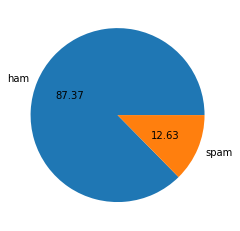

In [45]:
import matplotlib.pyplot as plt
plt.pie(spam_df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
spam_df['num_characters'] = spam_df['text'].apply(len)

In [48]:
spam_df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
spam_df['num_words'] = spam_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
spam_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [51]:
spam_df['num_sentences'] = spam_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [53]:
spam_df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [54]:
spam_df[spam_df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [55]:
spam_df[spam_df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:>

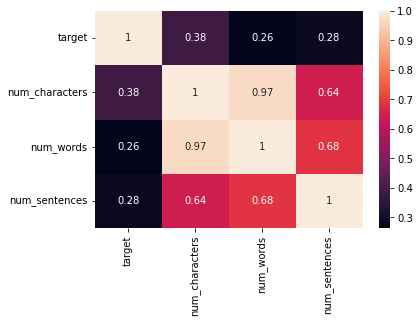

In [56]:
sns.heatmap(spam_df.corr(),annot=True)

### Data Preprocessing

In [57]:
ps = PorterStemmer()

In [58]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [65]:
import nltk  
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [66]:
transform_text("I'm gonna be home soon.")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [67]:
spam_df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [68]:
spam_df['transformed_text'] = spam_df['text'].apply(transform_text)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Lenovo/nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Lenovo\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Lenovo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
